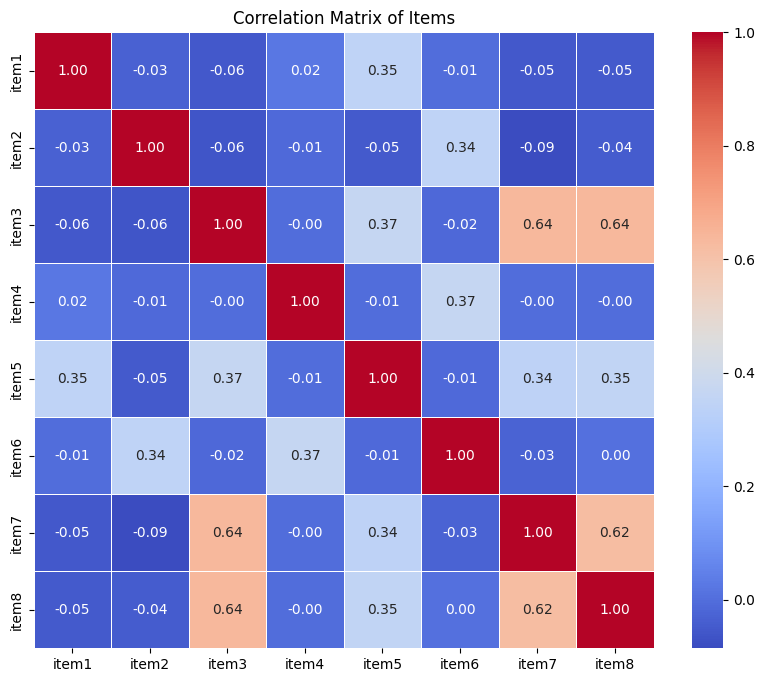

In [9]:
#Correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("8items.csv")

# Select only the columns related to items
items_df = df[['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']]

# Create the correlation matrix
correlation_matrix = items_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Items')
plt.show()


In [11]:
#NMF Factorization
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

responses = pd.read_csv('8items.csv')

# Drop the student column
responses = responses.drop(columns=['student'])

# NMF Factorization
n_skills = 8
nmf_model = NMF(n_components=n_skills, init='random', random_state=0)
W = nmf_model.fit_transform(responses)
H = nmf_model.components_

#Thresholding and Creating Q-matrix
threshold = H.max() * 0.1
q_matrix = pd.DataFrame(np.where(H > threshold, 1, 0), 
                        index=[f'Skill{i+1}' for i in range(n_skills)], 
                        columns = responses.columns)

# Print 
print("Q-matrix:")
print(q_matrix)

Q-matrix:
        item1  item2  item3  item4  item5  item6  item7  item8
Skill1      0      0      0      0      0      1      0      0
Skill2      0      0      0      1      0      0      0      0
Skill3      0      0      0      0      1      0      0      0
Skill4      0      0      1      0      0      0      0      0
Skill5      0      1      0      0      0      0      0      0
Skill6      0      0      0      0      0      0      1      0
Skill7      1      0      0      0      0      0      0      0
Skill8      0      0      0      0      0      0      0      1


In [17]:
#Factor Analysis
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

# Step 1: Read the CSV file
student_responses = pd.read_csv('8items.csv')

# Step 2: Drop the 'student' column
student_responses = student_responses.drop(columns=['student'])

# Step 3: Factor Analysis
n_factors = 7  # Specify the number of factors
factor_model = FactorAnalyzer(n_factors, rotation='varimax')  # You can choose different rotation methods
factor_model.fit(student_responses)

# Get factor loadings and factor scores
factor_loadings = pd.DataFrame(factor_model.loadings_, index=student_responses.columns)
factor_scores = pd.DataFrame(factor_model.transform(student_responses), columns=[f'Factor{i+1}' for i in range(n_factors)])

# Print the factor loadings
print("Factor Loadings:")
print(factor_loadings)

# Print the factor scores
print("\nFactor Scores:")
print(factor_scores)

Factor Loadings:
              0         1         2         3         4         5         6
item1 -0.094312  0.624164  0.020169 -0.026003 -0.011414  0.008710 -0.035394
item2 -0.050756 -0.031533 -0.001254  0.632691  0.003826 -0.006254 -0.011657
item3  0.817216  0.037838 -0.003033 -0.031390  0.197625 -0.035362  0.005742
item4 -0.004827  0.012092  0.651434 -0.019632  0.005653 -0.004362 -0.015957
item5  0.411013  0.622827 -0.015372 -0.016636  0.026710 -0.019810  0.081812
item6  0.007562 -0.000469  0.581870  0.546524 -0.023835  0.017875  0.062740
item7  0.794754  0.028940 -0.000785 -0.068461 -0.051095  0.184988  0.000343
item8  0.802412  0.039499 -0.000250 -0.004455 -0.123566 -0.140686  0.009735

Factor Scores:
       Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7
0    -1.077509  1.394960 -0.653059 -0.604578  0.011419 -0.040226  0.214124
1    -0.934818  0.529477 -0.989988  0.370652  0.083882 -0.080998  0.291193
2     0.988296 -0.976824 -0.921446  0.315247  0.008314  0.

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from pgmpy.estimators import StructureEstimator
from pgmpy.models import BayesianModel

# Step 1: Read the CSV file
student_responses = pd.read_csv('8items.csv')

# Step 2: Drop the 'student' column
student_responses = student_responses.drop(columns=['student'])

# Step 3: Factor Analysis
n_factors = 8
factor_model = FactorAnalyzer(n_factors, rotation='varimax')
factor_model.fit(student_responses)

# Get factor loadings and factor scores
factor_loadings = pd.DataFrame(factor_model.loadings_, index=student_responses.columns)
factor_scores = pd.DataFrame(factor_model.transform(student_responses), columns=[f'Factor{i+1}' for i in range(n_factors)])

# Step 4: Thresholding and Creating Partial Order Knowledge Space (POKS)
threshold = 0.5  # Adjust as needed
binary_responses = np.where(student_responses > threshold, 1, 0)
poks_matrix = pd.DataFrame(binary_responses, index=student_responses.index, columns=student_responses.columns)

# Step 5: Create Bayesian Model for POKS
structure_estimator = StructureEstimator(poks_matrix)
structure = structure_estimator.estimate()
poks_model = BayesianModel(structure)

# Step 6: Print the results
print("Factor Loadings:")
print(factor_loadings)

print("\nFactor Scores:")
print(factor_scores)

print("\nPartial Order Knowledge Space Matrix:")
print(poks_matrix)

print("\nBayesian Model for POKS:")
print(structure)

Factor Loadings:
              0         1         2         3         4         5         6  \
item1 -0.094312  0.624164  0.020169 -0.026003 -0.011414  0.008710 -0.035394   
item2 -0.050756 -0.031533 -0.001254  0.632691  0.003826 -0.006254 -0.011657   
item3  0.817216  0.037838 -0.003033 -0.031390  0.197625 -0.035362  0.005742   
item4 -0.004827  0.012092  0.651434 -0.019632  0.005653 -0.004362 -0.015957   
item5  0.411013  0.622827 -0.015372 -0.016636  0.026710 -0.019810  0.081812   
item6  0.007562 -0.000469  0.581870  0.546524 -0.023835  0.017875  0.062740   
item7  0.794754  0.028940 -0.000785 -0.068461 -0.051095  0.184988  0.000343   
item8  0.802412  0.039499 -0.000250 -0.004455 -0.123566 -0.140686  0.009735   

         7  
item1  0.0  
item2  0.0  
item3  0.0  
item4  0.0  
item5  0.0  
item6  0.0  
item7  0.0  
item8  0.0  

Factor Scores:
       Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0    -1.077509  1.394960 -0.653059 -0.604578  0.011419 -0.04